In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/roshie/nalaiyathiran-datasets/main/abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Univariate analysis

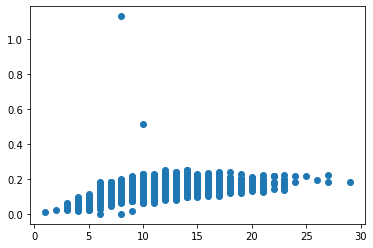

In [4]:
plt.scatter(df['Rings'], df['Height'])

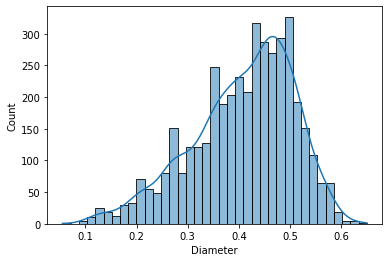

In [5]:
sns.histplot(df['Diameter'],kde=True)

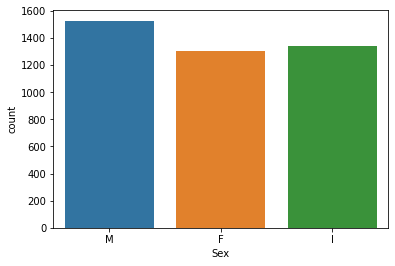

In [6]:
sns.countplot(x ='Sex', data = df)

## Bivariate analysis

In [7]:
df[['Length','Height','Rings']].corr()

,Length,Height,Rings
Length,1.000000,0.827554,0.556720
Height,0.827554,1.000000,0.557467
Rings,0.556720,0.557467,1.000000


(0.0, 1.2)

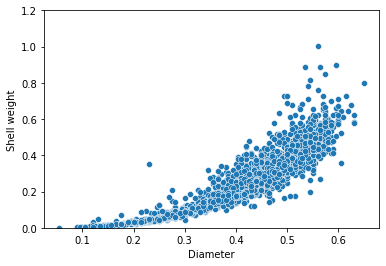

In [8]:
sns.scatterplot(x=df.Diameter,y=df['Shell weight'])
plt.ylim(0,1.2)

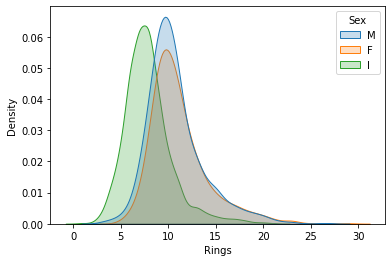

In [9]:
sns.kdeplot(data=df,x='Rings',hue='Sex',fill=True)

## Multivariate Analysis

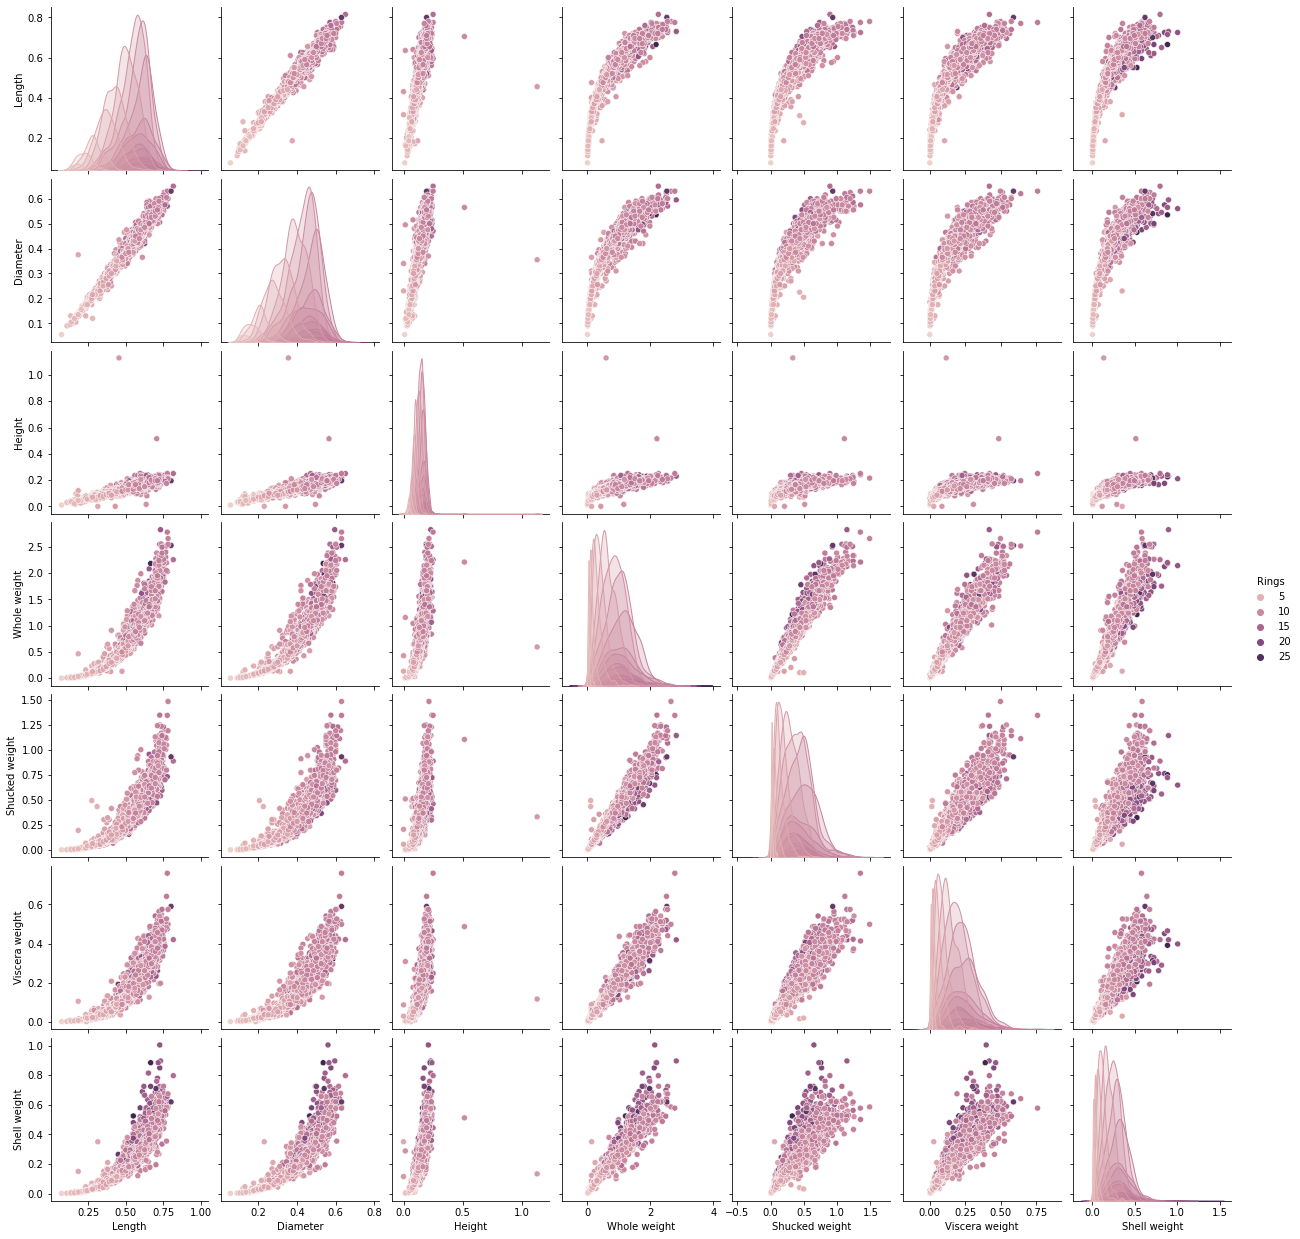

In [10]:
sns.pairplot(data=df,hue='Rings')

## Perform descriptive statistics on the dataset

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Check for Missing values and deal with them.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [13]:
df.shape

(4177, 9)

##Find the outliers and replace the outliers

In [14]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

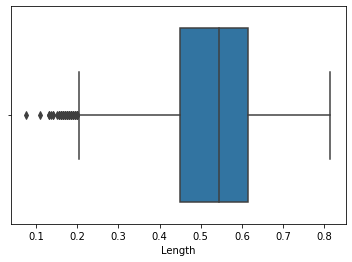

In [15]:
sns.boxplot(x=df['Length'])

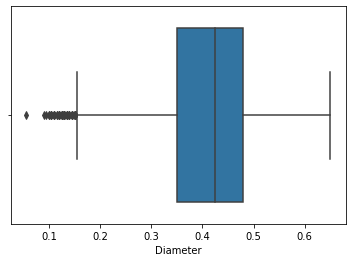

In [16]:
sns.boxplot(x=df['Diameter'])

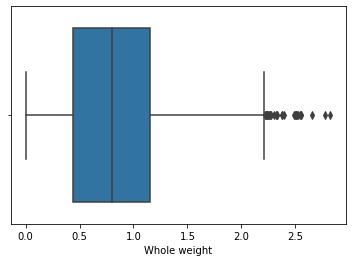

In [17]:
sns.boxplot(x=df['Whole weight'])

In [18]:
quant = df.quantile(q=(0.75, 0.25))
iqr = quant.iloc[0] - quant.iloc[1]
upper = quant.iloc[0] + (1.5*iqr)
lower = quant.iloc[0] - (1.5*iqr)
print(upper, lower)

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
dtype: float64 Length            0.36750
Diameter          0.28500
Height            0.09000
Whole weight      0.08575
Shucked weight    0.02800
Viscera weight    0.01375
Shell weight      0.03050
Rings             6.50000
dtype: float64


In [19]:
df['Rings'] = np.where(df['Rings'] > upper['Rings']-4, df['Rings'].mean(), df['Rings'])
df['Rings'] = np.where(df['Rings'] < lower['Rings']+1, df['Rings'].mean(), df['Rings'])

In [20]:
df['Whole weight'] = np.where(df['Whole weight'] < lower['Whole weight']+0.1, df['Whole weight'].mean(), df['Whole weight'])
df['Whole weight'] = np.where(df['Whole weight'] > upper['Whole weight']-0.3, df['Whole weight'].mean(), df['Whole weight'])

In [21]:
df['Shucked weight'] = np.where(df['Shucked weight'] < lower['Shucked weight']+0.1, df['Shucked weight'].mean(), df['Shucked weight'])
df['Shucked weight'] = np.where(df['Shucked weight'] > upper['Shucked weight']-0.22, df['Shucked weight'].mean(), df['Shucked weight'])

In [22]:
df['Viscera weight'] = np.where(df['Viscera weight'] < lower['Viscera weight']+0.115, df['Viscera weight'].mean(), df['Viscera weight'])
df['Viscera weight'] = np.where(df['Viscera weight'] > upper['Viscera weight']-0.25, df['Viscera weight'].mean(), df['Viscera weight'])

In [23]:
df['Shell weight'] = np.where(df['Shell weight'] < lower['Shell weight']+0.17, df['Shell weight'].mean(), df['Shell weight'])
df['Shell weight'] = np.where(df['Shell weight'] > upper['Shell weight']-0.32, df['Shell weight'].mean(), df['Shell weight'])

In [24]:
df['Height'] = np.where(df['Height'] > upper['Height']-0.1, df['Height'].mean(), df['Height'])
df['Height'] = np.where(df['Height'] < lower['Height']+0.1, df['Height'].mean(), df['Height'])

In [25]:
df['Diameter'] = np.where(df['Diameter'] < lower['Diameter']+0.1, df['Diameter'].mean(), df['Diameter'])
df['Diameter'] = np.where(df['Diameter'] > upper['Diameter']-0.1, df['Diameter'].mean(), df['Diameter'])

In [26]:
df['Length'] = np.where(df['Length'] > upper['Length']-0.15, df['Length'].mean(), df['Length'])
df['Length'] = np.where(df['Length'] < lower['Length']+0.1, df['Length'].mean(), df['Length'])

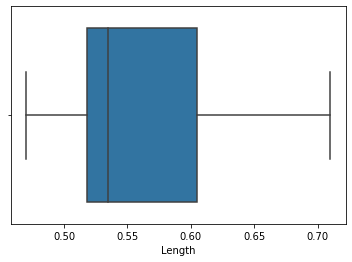

In [27]:
sns.boxplot(x=df['Length'])

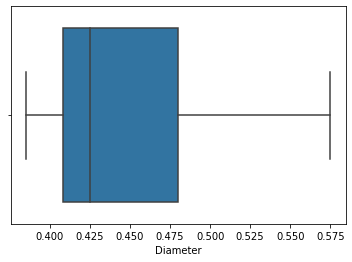

In [28]:
sns.boxplot(x=df['Diameter'])

## Check for Categorical columns and perform encoding

In [29]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [30]:
gen_n = {"M":0,"F":1, "I": 2}
df = df.replace(gen_n)

In [31]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.51835,0.407881,0.123899,0.5140,0.224500,0.180594,0.238831,9.933684
1,0,0.51835,0.407881,0.123899,0.2255,0.359367,0.180594,0.238831,8.886842
2,1,0.53000,0.420000,0.123899,0.6770,0.256500,0.141500,0.210000,9.000000
3,0,0.51835,0.407881,0.123899,0.5160,0.215500,0.180594,0.238831,10.000000
4,2,0.51835,0.407881,0.123899,0.2050,0.359367,0.180594,0.238831,8.886842


In [32]:
df['Rings'].value_counts()

9.933684     960
8.886842     839
9.000000     689
10.000000    634
8.000000     568
11.000000    487
Name: Rings, dtype: int64

In [33]:
label_encoder = preprocessing.LabelEncoder()
df['Rings']= label_encoder.fit_transform(df['Rings'])

## Split the data into dependent and independent variables

In [34]:
X = df.drop(columns=['Rings', 'Sex'])
Y = df['Rings']

## Scale the independent variables

In [35]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range = (0,1))
temp = minmax.fit_transform(X)
cols = X.columns
X = pd.DataFrame(data=temp,columns=cols)

In [36]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.201458,0.120428,0.0,0.189815,0.153232,0.456581,0.356895
1,0.201458,0.120428,0.0,0.022859,0.368504,0.456581,0.356895
2,0.250000,0.184211,0.0,0.284144,0.204310,0.110619,0.084906
3,0.201458,0.120428,0.0,0.190972,0.138867,0.456581,0.356895
4,0.201458,0.120428,0.0,0.010995,0.368504,0.456581,0.356895


In [37]:
Y.head()

0    3
1    1
2    2
3    4
4    1
Name: Rings, dtype: int64

## Split the data into training and testing

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [39]:
x_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2746,0.062500,0.120428,0.0,0.151331,0.097366,0.456581,0.278302
853,0.416667,0.368421,0.0,0.443287,0.416600,0.765487,0.693396
1809,0.708333,0.473684,0.0,0.513021,0.576217,0.889381,0.872249
3419,0.500000,0.447368,0.0,0.568576,0.655227,0.811644,0.745283
1199,0.224967,0.326271,0.0,0.407416,0.442893,0.811644,0.872249
...,...,...,...,...,...,...,...
1593,0.229167,0.120428,0.0,0.248264,0.211492,0.265487,0.356895
4060,0.312500,0.105263,0.0,0.273148,0.316840,0.137168,0.356895
1346,0.479167,0.342105,0.0,0.355035,0.331205,0.500000,0.339623
3454,0.437500,0.394737,0.0,0.508681,0.590583,0.756637,0.759434


In [40]:
y_train

2746    0
853     2
1809    0
3419    0
1199    4
       ..
1593    0
4060    0
1346    0
3454    0
3582    4
Name: Rings, Length: 3341, dtype: int64

### 11) Build the model

In [41]:
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier(n_estimators=10,criterion='entropy')

### 12) Train The model

In [42]:
lr = lr.fit(x_train, y_train)

In [43]:
pred = lr.predict(x_test)

### 13) Test the model

In [44]:
predictedAge = pd.DataFrame(pred, columns=['Predicted Rings']) 
actualAge = y_test
actualAge = actualAge.reset_index(drop=True) 
df_actual_vs_predicted = pd.concat([actualAge,predictedAge],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,826,827,828,829,830,831,832,833,834,835
Rings,1,4,2,2,3,3,5,2,3,1,...,2,3,5,1,0,2,1,3,3,0
Predicted Rings,1,3,1,3,4,3,3,2,3,1,...,2,0,3,1,3,0,0,3,3,2


In [45]:
lr_train_acc = lr.score(x_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(x_test, y_test)
print('Testing Score: ', lr_test_acc)

Training Score:  0.9557018856629752
Testing Score:  0.4126794258373206
